# Previsão da quantidade de pedidos de táxi para a próxima hora

# Contents <a id='back'></a>

* [Introdução](#intro)
* [Etapa 1. Visão geral dos dados](#data_review)
* [Etapa 2. EDA](#eda)
* [Etapa 3. Modelo](#model)
* [Conclusões](#end)
    

A empresa Sweet Lift Taxi coletou dados históricos sobre pedidos de táxi nos aeroportos. Para atrair mais motoristas durante o horário de pico, precisamos prever a quantidade de pedidos de táxi para a próxima hora. 	
Construa um modelo para tal predição.

A métrica REQM no conjunto de teste não deve ser superior a 48.

## Instruções do projeto

1. Faça download dos dados e faça uma nova amostragem em uma hora.
2. Analise os dados
3. Treine diferentes modelos com diferentes hiperparâmetros. A amostra de teste deve ser 10% do conjunto de dados inicial.
4. Teste os dados usando a amostra de teste e forneça uma conclusão.

### Objetivo: 
- Você seguiu todos os passos das instruções?
- Como você preparou os dados?
- Quais modelos e hiperparâmetros você considerou?
- Você conseguiu evitar a duplicação de código?
- Quais são as suas descobertas?
- Você manteve a estrutura do projeto?
- Você manteve o código limpo?

## Descrição dos dados

Os dados são armazenados no arquivo `taxi.csv`. O número de pedidos está na coluna `num_orders`.

## Etapa 1. Visão geral dos dados <a id='data_review'></a>

Carregue os dados das consultas, explore-os e carregue bibliotecas que você acredita que são necessárias para o projeto.

In [1]:
# Importa as bibliotecas necessárias
import pandas as pd  # Utilizada para manipulação de dados em DataFrames
import numpy as np  # Utilizada para trabalhar com arrays e operações numéricas

import warnings  # Utilizada para controlar a exibição de avisos no código

# Ignora os avisos que possam aparecer durante a execução do código
warnings.filterwarnings("ignore")

In [2]:
# Lendo o arquivo CSV
df = pd.read_csv(
    'C:/Users/gabri/Downloads/Corrigido/Projeto 13/taxi.csv',  # Caminho para o arquivo CSV
    index_col=[0],  # Usando a primeira coluna como índice do DataFrame
    parse_dates=[0]  # Convertendo a primeira coluna para o tipo de dado datetime
)

In [3]:
# Exibindo informações gerais sobre o DataFrame
df.info()  # Mostra o número de entradas, colunas, tipos de dados e valores não nulos

print()  # Imprime uma linha em branco para melhor legibilidade da saída

# Exibindo uma amostra aleatória de 10 linhas do DataFrame
sample_data = df.sample(10)  # Seleciona aleatoriamente 10 linhas do DataFrame
print(sample_data)  # Exibe a amostra selecionada

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB

                     num_orders
datetime                       
2018-03-27 11:30:00           5
2018-03-18 05:40:00          10
2018-05-08 04:40:00           7
2018-04-01 04:20:00           2
2018-08-05 17:40:00          20
2018-06-29 23:30:00          25
2018-03-20 15:20:00          11
2018-07-10 04:00:00          23
2018-06-09 19:30:00          27
2018-06-25 22:40:00          11


In [4]:
# Exibindo estatísticas descritivas do DataFrame
statistics_summary = df.describe()  # Calcula estatísticas descritivas para colunas numéricas
print(statistics_summary)  # Exibe o resumo estatístico

         num_orders
count  26496.000000
mean      14.070463
std        9.211330
min        0.000000
25%        8.000000
50%       13.000000
75%       19.000000
max      119.000000


### Valores ausentes <a id='missing_values'></a>

In [5]:
# Verificar Valores Ausentes
df.isna().sum()

num_orders    0
dtype: int64

In [6]:
df.sort_index(inplace=True)

In [7]:
# Realizando uma nova amostragem com uma hora de diferença.
df = df.resample('1H').sum()

Podemos ver que não valores ausentes e está tudo correto com nossa base de bados.

## Etapa 2. EDA <a id='eda'></a>


In [8]:
df

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


In [9]:
import matplotlib.pyplot as plt

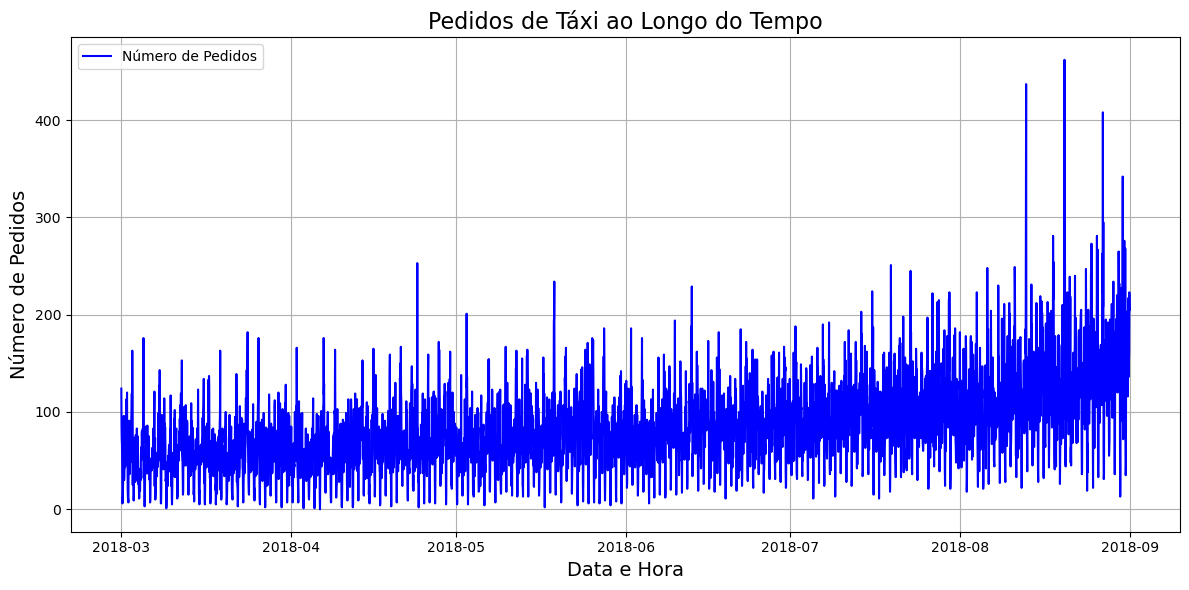

In [10]:
# Configurando o tamanho da figura
plt.figure(figsize=(12, 6))  # Aumentando a largura da figura para melhor visualização

# Definindo o título do gráfico
plt.title('Pedidos de Táxi ao Longo do Tempo', fontsize=16)  # Título com tamanho de fonte maior

# Plotando a série temporal usando a coluna 'num_orders'
plt.plot(df.index, df['num_orders'], color='blue', label='Número de Pedidos')  # Usando o índice como eixo X

# Adicionando rótulos aos eixos
plt.xlabel('Data e Hora', fontsize=14)  # Rótulo do eixo X
plt.ylabel('Número de Pedidos', fontsize=14)  # Rótulo do eixo Y

# Adicionando uma grade ao gráfico para facilitar a leitura
plt.grid(True)

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()  # Mostra o gráfico na tela

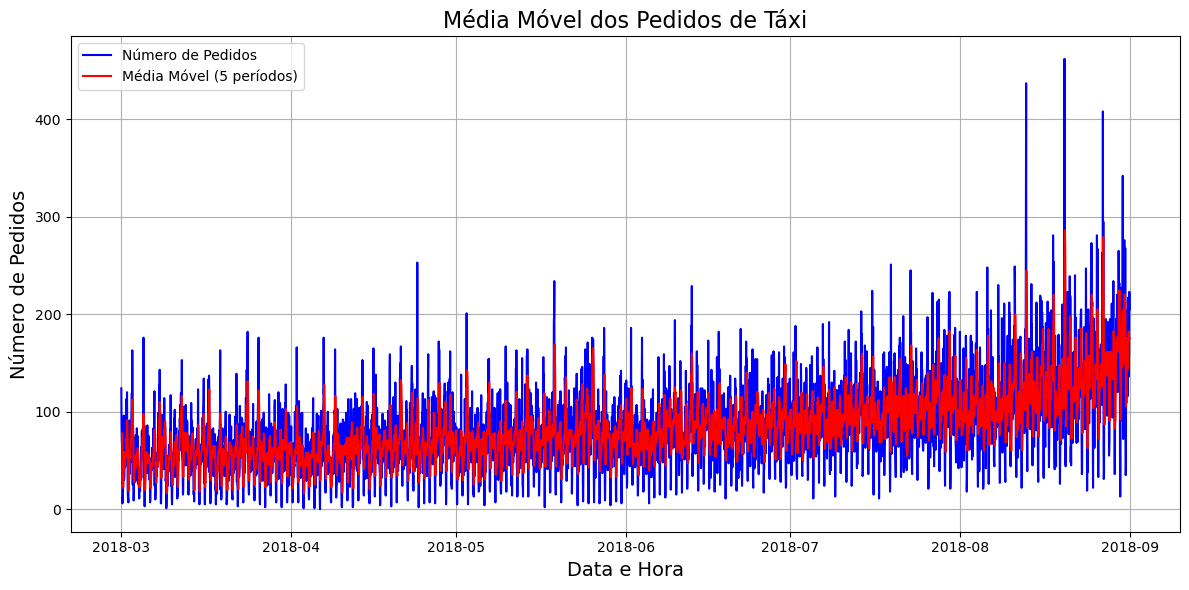

In [11]:

df_copy = df.copy()

df_copy['media_movel'] = df_copy['num_orders'].rolling(5).mean()

# Configurando o tamanho da figura
plt.figure(figsize=(12, 6))

# Definindo o título do gráfico
plt.title('Média Móvel dos Pedidos de Táxi', fontsize=16)

# Plotando a série temporal original do DataFrame copiado
plt.plot(df_copy.index, df_copy['num_orders'], color='blue', label='Número de Pedidos')

# Plotando a média móvel do DataFrame copiado
plt.plot(df_copy.index, df_copy['media_movel'], color='red', label='Média Móvel (5 períodos)')

# Adicionando rótulos aos eixos
plt.xlabel('Data e Hora', fontsize=14)
plt.ylabel('Número de Pedidos', fontsize=14)

# Adicionando uma grade ao gráfico
plt.grid(True)

# Adicionando uma legenda
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
decomposed = seasonal_decompose(df)

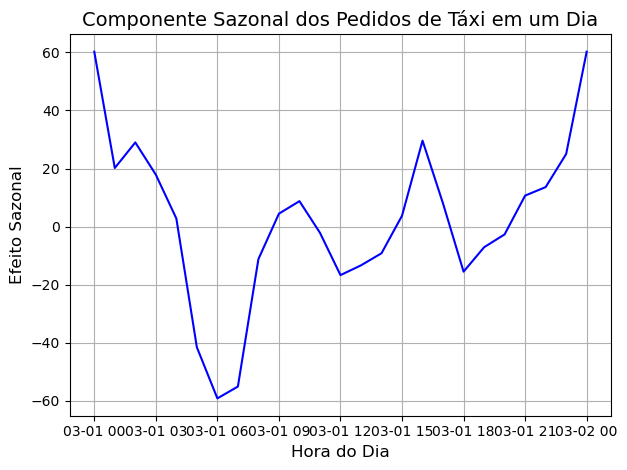

In [14]:
# Plotando a componente sazonal em um dia específico
plt.plot(decomposed.seasonal['2018-03-01 00:00:00':'2018-03-02 00:00:00'], color='blue')

# Definindo o título do gráfico
plt.title('Componente Sazonal dos Pedidos de Táxi em um Dia', fontsize=14)  # Reduzindo o tamanho da fonte do título

# Adicionando rótulos aos eixos
plt.xlabel('Hora do Dia', fontsize=12)  # Reduzindo o tamanho da fonte dos rótulos dos eixos
plt.ylabel('Efeito Sazonal', fontsize=12)

# Adicionando uma grade ao gráfico
plt.grid(True)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

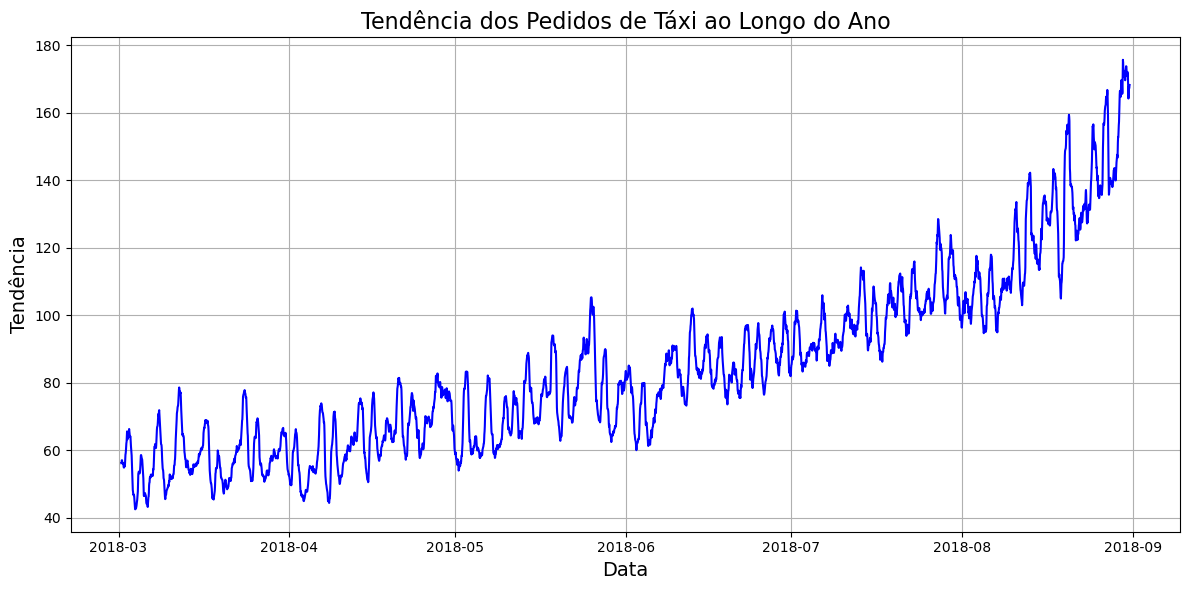

In [15]:
# Configurando o tamanho da figura
plt.figure(figsize=(12, 6))

# Plotando a componente de tendência ao longo do ano
plt.plot(decomposed.trend['2018-03-01':'2018-08-31'], color='blue')

# Definindo o título do gráfico
plt.title('Tendência dos Pedidos de Táxi ao Longo do Ano', fontsize=16)

# Adicionando rótulos aos eixos
plt.xlabel('Data', fontsize=14)
plt.ylabel('Tendência', fontsize=14)

# Adicionando uma grade ao gráfico
plt.grid(True)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

Ao começo parece ser uma série temporal é estacionária 
Porém há uma tendência quando se chega mais perto do fim de ano e uma sazonalidade quando mais está perto de encerrar o dia.

Dados pré processados podemos ir para criação do nosso modelo.

## Etapa 3. Modelo <a id='model'></a>

In [21]:
# Importando bibliotecas necessárias
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import math

In [22]:
# Função para criar características
def make_features(df, max_lag, rolling_mean_size):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = (
        df['num_orders'].shift().rolling(rolling_mean_size).mean())

In [23]:
# Criando as características
make_features(df, 6, 10)

# Dividindo os dados em treino e teste
train, test = train_test_split(df, shuffle=False, test_size=0.2)
train = train.dropna()

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

In [24]:
# Definindo o modelo e a grade de hiperparâmetros
model = LinearRegression()
param_grid = {
    'fit_intercept': [True, False],
}

# Ajustando o modelo com GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(features_train, target_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Fazendo previsões
train_predictions = best_model.predict(features_train)
test_predictions = best_model.predict(features_test)

# Avaliando o desempenho do modelo
train_rmse = math.sqrt(mse(target_train, train_predictions))
test_rmse = math.sqrt(mse(target_test, test_predictions))

print(f'RMSE no conjunto de treino: {train_rmse:.2f}')
print(f'RMSE no conjunto de teste: {test_rmse:.2f}')

Melhores hiperparâmetros: {'fit_intercept': False}
RMSE no conjunto de treino: 29.05
RMSE no conjunto de teste: 47.99


In [25]:
# Definindo o modelo e a grade de hiperparâmetros para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Ajustando o modelo com GridSearchCV
rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(features_train, target_train)

# Melhor modelo encontrado
best_rf_model = grid_search_rf.best_estimator_
print("Melhores hiperparâmetros para Random Forest:", grid_search_rf.best_params_)

# Fazendo previsões
train_predictions_rf = best_rf_model.predict(features_train)
test_predictions_rf = best_rf_model.predict(features_test)

# Avaliando o desempenho do modelo
train_rmse_rf = math.sqrt(mse(target_train, train_predictions_rf))
test_rmse_rf = math.sqrt(mse(target_test, test_predictions_rf))

print(f'RMSE no conjunto de treino (Random Forest): {train_rmse_rf:.2f}')
print(f'RMSE no conjunto de teste (Random Forest): {test_rmse_rf:.2f}')

Melhores hiperparâmetros para Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
RMSE no conjunto de treino (Random Forest): 19.38
RMSE no conjunto de teste (Random Forest): 54.05


## Conclusão geral <a id='end'></a>

Neste projeto, importamos bibliotecas como "pandas" e "numpy" que habitualmente já utilizamos e sklearn para criação do nosso modelo.
Realizamos o pre-processamento, para que não tivesse acontecido algum problema na criação do nosso modelo. O modelo com melhor pontuação no **REQM** foi o Modelo Regressão Linear, abaixo de 48 conforme que foi pedido.